## <center> Notebook 1: Representación del grafo y conexidad<center>

* Los objetos o la abstracción de los datos interpretados en los archivo .csv se ubican en el archivo grafoDeClientes.py
* Para la representacion grafica del grafo se ha recurrio a la libreria networkx.

codigo:  A calle:  2 carrera:  1
codigo:  B calle:  19 carrera:  1
codigo:  C calle:  5 carrera:  2
codigo:  D calle:  11 carrera:  3
codigo:  E calle:  18 carrera:  5
codigo:  F calle:  4 carrera:  6
codigo:  G calle:  12 carrera:  7
codigo:  H calle:  20 carrera:  8
codigo:  I calle:  16 carrera:  10
codigo:  J calle:  10 carrera:  10
codigo:  K calle:  7 carrera:  11
codigo:  L calle:  5 carrera:  13
codigo:  M calle:  11 carrera:  13
codigo:  N calle:  19 carrera:  14
codigo:  O calle:  16 carrera:  16
codigo:  P calle:  4 carrera:  17
codigo:  Q calle:  9 carrera:  17
codigo:  R calle:  11 carrera:  19
codigo:  S calle:  1 carrera:  20
codigo:  T calle:  20 carrera:  20


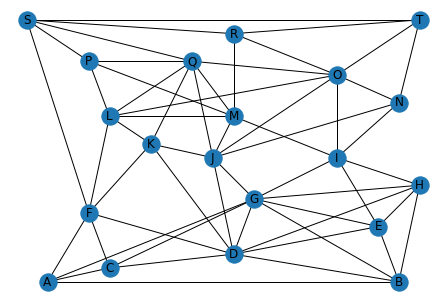

In [2]:
from model.vertice import *
from model.arista import *
from model.grafo import *
import networkx as nx
from grafoDeClientes import MAPA

def showGrafo(pgrafo:grafo):#showGrafico
    
    G=nx.Graph()
    nodo_anterior = ""
    for nodo in pgrafo.verticesV:
        
        G.add_node(nodo.codigo,pos=(nodo.direccion['calle'],nodo.direccion['carrera']))
        print("codigo: ",nodo.codigo,"calle: ",nodo.direccion['calle'],"carrera: ",nodo.direccion['carrera'])
        
        for vecino in nodo.vecinos:
            if nodo.codigo != nodo_anterior:
                G.add_edge(nodo.codigo,vecino)
                
        nodo_anterior = nodo.codigo
    
    pos=nx.get_node_attributes(G,"pos")    
    nx.draw(G,pos,with_labels=True )
    

showGrafo(MAPA)

## COMPROBACION DE QUE EL GRAFO ESTA COMPLETAMENTE CONECTADO

* Para determinar si un arbol esta totalmente conectado, existen dos algoritmos especializados. Sin embargo, cabe destacar que el propósito de estos algoritmos no se limita a determinar si esta o no conectado.En realidad los algoritmos DFS y BFS son algoritmos pensados en determinar si existe al menos un arbol minimo de expansion.

### Algoritmo Depth-First Search (busqueda en profundidad)

La idea del procedimiento DFS(G, v) es la siguiente:
* Se marca el nodo v.
* Si todos los nodos adyacentes a v están marcados, entonces TERMINAR; si no, se elige un nodo, w, adyacente a v que no esté marcado.
* Se ejecuta el proceso DF S(G, w). Si G es conexo (es decir, si dos vértices cualesquiera de G siempre están conectados por un camino), entonces DF S(G, v) visita todos los nodos y aristas del grafo.
* El algoritmo funciona de manera recursiva.

Algoritmo en pseudocódigo:

1  método DFS( origen):
2      marcamos origen como parcialmente_visitado 
3          para cada vertice w adyacente a v en el Grafo: 
4              si w no ha sido visitado:
5	          marcamos como parcialmente_visitado w
6                 llamamos recursivamente DFS( w ) 
7      marcamos al nodo como visitado

In [1]:
from model.vertice import *
from model.arista import *
from model.grafo import *
from grafoDeClientes import MAPA
from model.algoritmosDeExploracion import DepthFirstSearch

raiz = MAPA.getVertice('J')
dfs = DepthFirstSearch()
dfs.ejecutarArlgoritmo( MAPA, raiz)
print("El algoritmo DFS determinó que el grafo tiene todos sus vertices conectados? : "+ str(dfs.estaTotalmenteConectado()))
print(" --- REPORTE DE VISITAS ---")
dfs.imprimirRecorrido()

vertice :J parcialmente visitado.
vertice :D parcialmente visitado.
vertice :B parcialmente visitado.
vertice :A parcialmente visitado.
vertice :C parcialmente visitado.
vertice :F parcialmente visitado.
vertice :K parcialmente visitado.
vertice :L parcialmente visitado.
vertice :M parcialmente visitado.
vertice :I parcialmente visitado.
vertice :E parcialmente visitado.
vertice :G parcialmente visitado.
vertice :H parcialmente visitado.
vertice :H parcialmente visitado.
vertice :G parcialmente visitado.
vertice :E parcialmente visitado.
vertice :N parcialmente visitado.
vertice :O parcialmente visitado.
vertice :Q parcialmente visitado.
vertice :P parcialmente visitado.
vertice :S Totalmente visitado.
vertice :R Totalmente visitado.
vertice :T Totalmente visitado.
vertice :T Totalmente visitado.
vertice :R Totalmente visitado.
vertice :S Totalmente visitado.
vertice :P Totalmente visitado.
vertice :Q Totalmente visitado.
vertice :O Totalmente visitado.
vertice :N Totalmente visitado.


### Algoritmo Breadth-First Search (busqueda en anchura)


La idea del procedimiento BF S(G, v) es la siguiente:
* Se marca el nodo v.
* Si todos los nodos adyacentes a v están marcados, entonces TERMINAR; si no, marcar todos los nodos v1, v2, . . . , vk adyacentes a v que no est´en marcados.
* Repetir el proceso con los nodos adyacentes a los nodos que se han marcado en el paso anterior.

Si G es conexo (es decir, si dos vértices cualesquiera de G siempre est´an conectados por
un camino), entonces BF S(G, v) visita todos los nodos y aristas del grafo.


1  método BFS(Grafo,origen):
2      creamos una cola Q
3      agregamos origen a la cola Q
4      marcamos origen como visitado
5      mientras Q no este vacío:
6          sacamos un elemento de la cola Q llamado v
7          para cada vertice w adyacente a v en el Grafo: 
8              si w no ah sido visitado:
9                 marcamos como visitado w
10                 insertamos w dentro de la cola Q


In [14]:
from model.vertice import *
from model.arista import *
from model.grafo import *
from grafoDeClientes import MAPA
from model.algoritmosDeExploracion import BreadthFirstSearch

raiz = MAPA.getVertice('J')
bfs = BreadthFirstSearch()
bfs.ejecutarArlgoritmo( MAPA, raiz)
print("El algoritmo BFS determinó que el grafo tiene todos sus vertices conectados? : "+ str(bfs.estaTotalmenteConectado()))
print(" --- REPORTE DE VISITAS ---")
bfs.imprimirRecorrido()

El algoritmo BFS determinó que el grafo tiene todos sus vertices conectados? : True
vertice J visitado.
vertice D visitado.
vertice G visitado.
vertice K visitado.
vertice M visitado.
vertice N visitado.
vertice O visitado.
vertice Q visitado.
vertice B visitado.
vertice C visitado.
vertice E visitado.
vertice F visitado.
vertice H visitado.
vertice A visitado.
vertice I visitado.
vertice L visitado.
vertice P visitado.
vertice R visitado.
vertice T visitado.
vertice S visitado.


In [5]:
def imprimirBanner():
    print("\n")
    print("\t ----|---- ----|----")
    print("\t  \==|=========|==/")
    print("\t  /       @       \\")
    print("\t\t / \\")
    print("\t\t/   \\")
    print("\t  [DRONMICILIOS.PY]")
    print("\n")

imprimirBanner()



	 ----|---- ----|----
	  \==|=========|==/
	  /       @       \
		 / \
		/   \
	  [DRONMICILIOS.PY]


